In [59]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Add parent directory to path to allow import of config.py
sys.path.append("..")

import config as conf

For our baseline or 'naive' model, we will use a simple linear regression model on enrolment as a function of time. This model is not expected to perform well, but it will give us a baseline for the simplest possible model to compare other models to.

In [60]:
data = pd.read_csv(f'{conf.DATA_PATH}{conf.FORMATTED_DATAFILE}')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Census Enrollment                14 non-null     float64
 1   Census Fill Rate                 14 non-null     float64
 2   Count of Migrated Data           14 non-null     float64
 3   Current Enrollment               14 non-null     float64
 4   Current Fill Rate                14 non-null     float64
 5   Enrollment Capacity              14 non-null     float64
 6   Ftef                             14 non-null     float64
 7   Ftes                             14 non-null     float64
 8   Ftes/Ftef                        14 non-null     float64
 9   Number Retained                  14 non-null     float64
 10  Number Successful                14 non-null     float64
 11  Retention Rate                   14 non-null     float64
 12  Sec. Count              

To do a simple x, y linear fit, we first need to do a little data formatting. The goal is to make a timeseries where the date is x and enrollment is y.

In [61]:
def decode_year(row):
    for col in years.columns:
        if row[col]==1:
            col = col.replace("year_", "")
            return col
        
def decode_semester(row):
    for col in semesters.columns:
        if row[col]==1:
            col = col.replace("semester_", "")
            return col
        
def decode_semester_strings(semesters):
    census_months = []
    census_days = []

    for semester in list(semesters):

        if semester == 'FA':
            census_months.append(9)
            census_days.append(8)

        elif semester == 'SP':
            census_months.append(2)
            census_days.append(8)

        elif semester == 'SU':
            census_months.append(5)
            census_days.append(14)

    return census_months, census_days

def make_xy_data(data):
    years = data.filter(regex=("year.*"))
    semesters = data.filter(regex=("semester.*"))

    decoded_years = years.apply(decode_year, axis=1)
    decoded_semesters = semesters.apply(decode_semester, axis=1)

    census_months, census_days = decode_semester_strings(decoded_semesters)

    x = pd.to_datetime(dict(year=decoded_years, month=census_months, day=census_days))
    y = data['Census Enrollment']
    
    return x, y

In [83]:
x, y = make_xy_data(data)

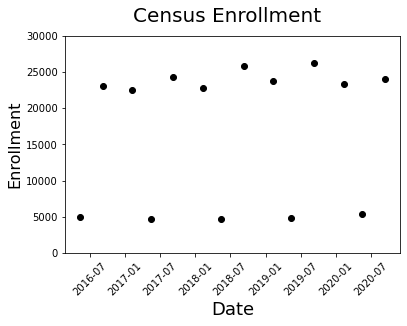

In [91]:
fig = plt.figure()
plt.scatter(x, y, color='black')
plt.axis([None, None, 0, 30000])
plt.xticks(rotation = 45)
fig.suptitle('Census Enrollment', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Enrollment', fontsize=16)
plt.show()

The orignal plan was to fit this data with one line and call that the minimal model. But looking at the data, I think that is going a bit to far, in terms of oversimplifying on purpous to make the other models look good. I think that what we have to do is use two linear fits, one to summer semesters and the other to fall and spring.

In [85]:
SU_data = data[data['semester_SU'] == 1]
SU_x, SU_y = make_xy_data(SU_data)

FA_SP_data = data[data['semester_SU'] == 0 ]
FA_SP_x, FA_SP_y = make_xy_data(FA_SP_data)

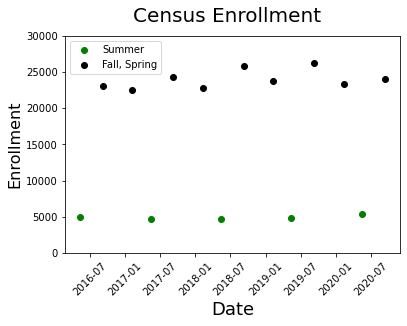

In [93]:
fig = plt.figure()
plt.scatter(SU_x, SU_y, c='green', label='Summer')
plt.scatter(FA_SP_x, FA_SP_y, c='black', label='Fall, Spring')
plt.legend(loc='upper left')
plt.axis([None, None, 0, 30000])
plt.xticks(rotation = 45)
fig.suptitle('Census Enrollment', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Enrollment', fontsize=16)
plt.show()